In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


--- 1. File CSV Berhasil Dimuat ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- 2. Info Awal Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage

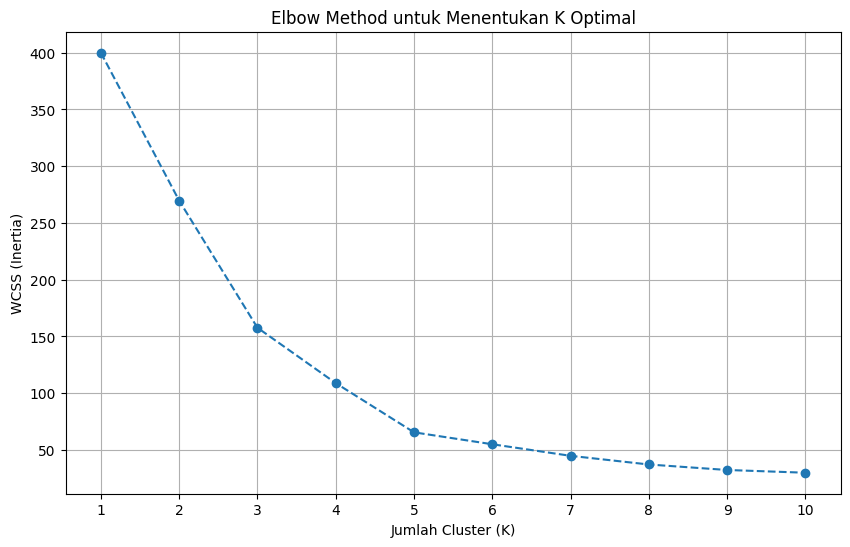

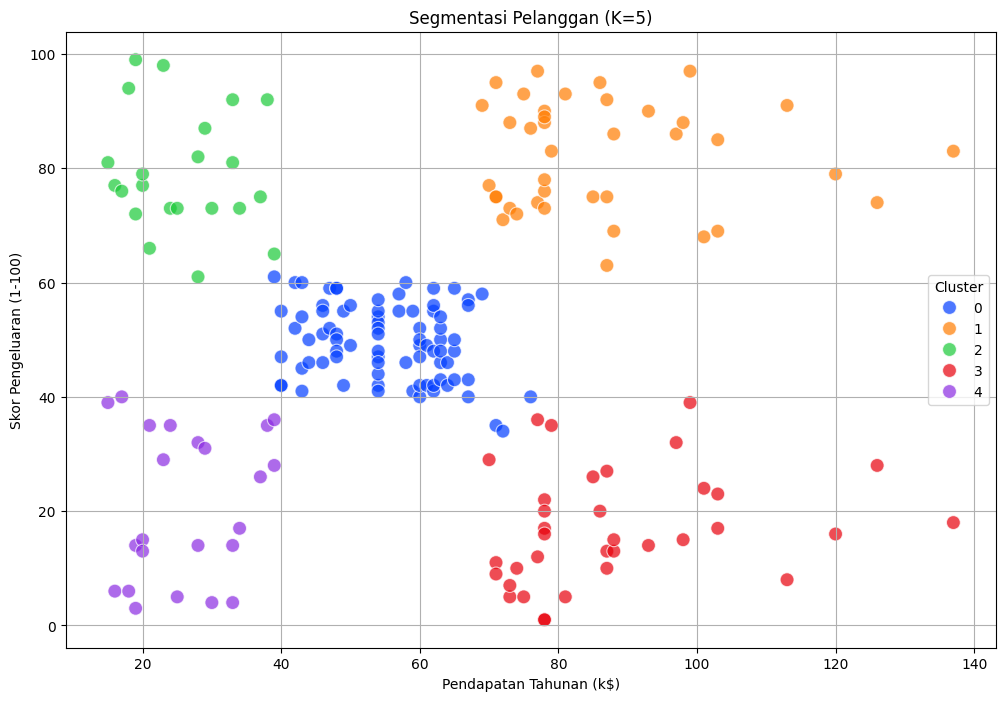

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- TAHAP 1 & 2: MEMUAT & MEMAHAMI DATA ---
# (Path ini disesuaikan dengan lokasimu)
file_path = '/content/drive/MyDrive/Data Mining/Mall_Customers.csv'

try:
    data = pd.read_csv(file_path)
    print("--- 1. File CSV Berhasil Dimuat ---")
    print(data.head())

    print("\n--- 2. Info Awal Dataset ---")
    data.info()

    # --- TAHAP 3: PERSIAPAN DATA ---
    print("\n--- 3. Persiapan Data ---")

    # 3.1 Memilih fitur
    # Kita hanya menggunakan 'Annual Income' dan 'Spending Score'
    X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
    print("Fitur yang dipilih: 'Annual Income (k$)' dan 'Spending Score (1-100)'")

    # 3.2 Cek missing values
    print(f"\nJumlah Missing Values:\n{X.isnull().sum()}")

    # 3.3 Melakukan Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("\nData berhasil di-scaling (dinormalisasi).")


    # --- TAHAP 4: MODELING (ELBOW METHOD) ---
    print("\n--- 4. Mencari K Optimal (Elbow Method) ---")
    wcss = []
    k_range = range(1, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plotting Elbow Method
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method untuk Menentukan K Optimal')
    plt.xlabel('Jumlah Cluster (K)')
    plt.ylabel('WCSS (Inertia)')
    plt.xticks(k_range)
    plt.grid(True)
    # plt.show() # Di Colab, plot akan otomatis muncul di akhir eksekusi cell
    print("Grafik Elbow Method akan ditampilkan di output.")


    # --- TAHAP 5: MODELING (FINAL) ---
    print("\n--- 5. Melatih Model Final (K=5) ---")
    K_OPTIMAL = 5
    kmeans_model = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)
    y_kmeans = kmeans_model.fit_predict(X_scaled)
    print("Model K-Means (K=5) berhasil dilatih.")

    # --- TAHAP 6: EVALUASI (VISUALISASI) ---
    print("\n--- 6. Visualisasi Hasil Cluster ---")

    # 6.1 Menambahkan hasil cluster ke dataframe asli
    data['Cluster'] = y_kmeans
    print("Label cluster ditambahkan ke DataFrame.")

    # 6.2 Visualisasi Hasil Cluster
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=data,
        x='Annual Income (k$)',
        y='Spending Score (1-100)',
        hue='Cluster',
        palette=sns.color_palette('bright', n_colors=K_OPTIMAL),
        s=100,
        alpha=0.7,
        edgecolor='w'
    )
    plt.title(f'Segmentasi Pelanggan (K={K_OPTIMAL})')
    plt.xlabel('Pendapatan Tahunan (k$)')
    plt.ylabel('Skor Pengeluaran (1-100)')
    plt.legend(title='Cluster')
    plt.grid(True)
    # plt.show() # Plot kedua juga akan otomatis muncul
    print("Grafik Segmentasi Pelanggan akan ditampilkan di output.")


except FileNotFoundError:
    print(f"Error: File tidak ditemukan di path '{file_path}'")
    print("Pastikan nama folder 'Data mining' dan nama file 'Mall_Customers.csv' sudah benar (termasuk huruf besar/kecilnya).")
except Exception as e:
    print(f"Terjadi error: {e}")

In [ ]:
# 4.1 Menjalankan loop untuk mencari WCSS
print("--- 4. Mencari K Optimal (Elbow Method) ---")
wcss = [] # Within-Cluster Sum of Squares
k_range = range(1, 11) # Mencoba K dari 1 sampai 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ adalah nilai WCSS

# 4.2 Plotting Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show() # Grafik akan ditampilkan di output

In [ ]:
# 5. Melatih Model K-Means dengan K=5
print("--- 5. Melatih Model Final (K=5) ---")
K_OPTIMAL = 5
kmeans_model = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_model.fit_predict(X_scaled)
print(f"Model K-Means (K={K_OPTIMAL}) berhasil dilatih.")

In [ ]:
# 6.1 Menambahkan hasil cluster ke dataframe asli
data['Cluster'] = y_kmeans
print("Label cluster telah ditambahkan ke DataFrame.")
print(data.head()) # Menampilkan data dengan kolom cluster baru

# 6.2 Visualisasi Hasil Cluster
print("--- 6. Visualisasi Hasil Cluster ---")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster', # Warna dibedakan berdasarkan kolom 'Cluster'
    palette=sns.color_palette('bright', n_colors=K_OPTIMAL), # Palet warna
    s=100,  # Ukuran marker
    alpha=0.7,
    edgecolor='w'
)
plt.title(f'Segmentasi Pelanggan (K={K_OPTIMAL})')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show() # Grafik akan ditampilkan di output